In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.special import jn
from scipy.sparse import identity, csr_matrix, kron, diags, eye
from scipy.linalg import expm
import tools

# Restructured Classical 

0.011654514198198332
-0.0670895759704737
0.06708957597047308
0.11777633800717328


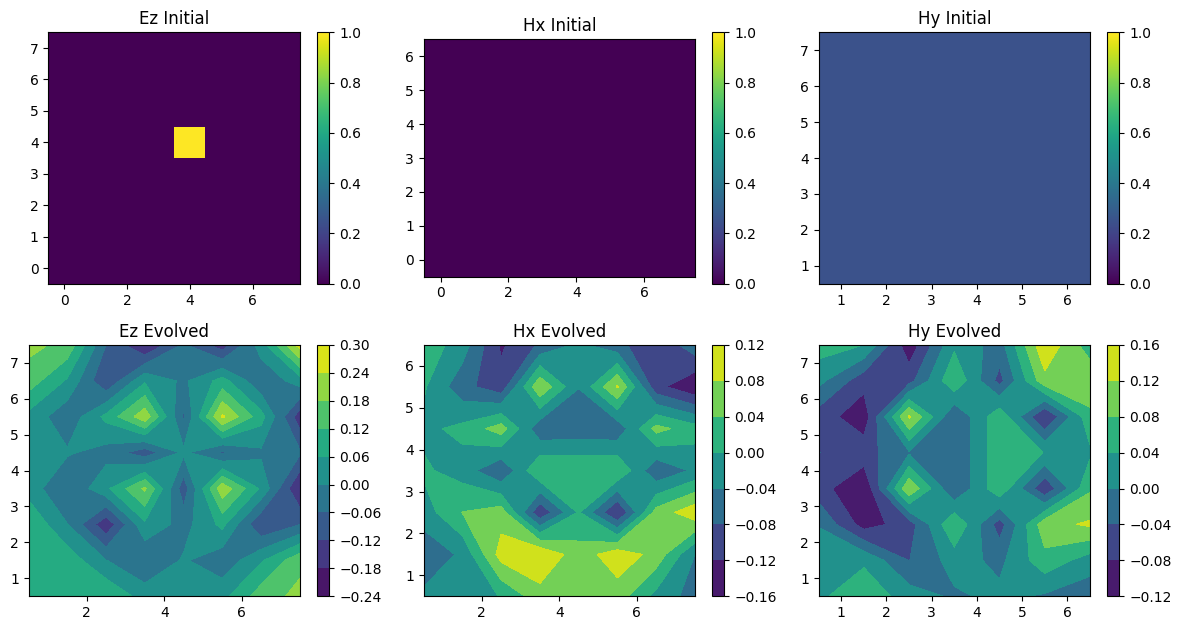

In [2]:
# Parameters
nx = 8
sigma_x = nx/6
sigma_y = nx/6
mu = nx/2            
T = 5

# Create coordinate grid
x = np.linspace(0, nx-1, nx)
y = np.linspace(0, nx-1, nx)
X, Y = np.meshgrid(x, y)
mask = np.arange(1, nx*nx+1) % nx != 0

# # 2D Gaussian function
# gaussian_2d = np.exp(-((X - mu)**2)/ (2 * sigma_x**2) - ((Y - mu)**2)/ (2 * sigma_y**2) )
# gaussian_2d /= gaussian_2d.sum()
# gaussian_flat = gaussian_2d.flatten()
# initial_state = np.pad(gaussian_flat, (0, 4*nx*nx - len(gaussian_flat)), mode='constant')
xref = nx//2
yref = nx//2

deltastate = np.zeros(4*nx*nx)
deltastate[nx*yref+xref] = 1
deltastate[0:nx*nx] = deltastate[0:nx*nx]
norm = np.linalg.norm(deltastate)
initial_state = deltastate/norm

EzHxHy =  norm*tools.ebu_classical(nx , T , initial_state)[0]
EzHxHy[0:nx*nx] = EzHxHy[0:nx*nx]
x = 4
y = 4
print(EzHxHy[nx*y + x])
print(EzHxHy[2*nx*nx + nx * y + x])
print(EzHxHy[3*nx*nx + nx * y + x])

#Plotting 
fig, axs = plt.subplots(2, 3, figsize=(12, 6.4))

# im1 = axs[0].contourf(gaussian_2d, cmap="viridis", origin="lower")
im1 = axs[0, 0].imshow(initial_state[:nx*nx].reshape(nx, nx), cmap="viridis", origin="lower")
axs[0,0].set_title("Ez Initial")
fig.colorbar(im1, ax=axs[0,0])

# im2 = axs[0,1].contourf(gaussian_2d, cmap="viridis", origin="lower")
im2 = axs[0, 1].imshow(initial_state[2*nx*nx:3*nx*nx-nx].reshape(nx-1, nx), cmap="viridis", origin="lower")
axs[0,1].set_title("Hx Initial")
fig.colorbar(im1, ax=axs[0,1])

# im3 = axs[0, 2].contourf(gaussian_2d, cmap="viridis", origin="lower")
im3 = axs[0, 2].contourf(initial_state[-nx*nx:][mask].reshape(nx, nx-1), cmap="viridis", origin="lower")
axs[0,2].set_title("Hy Initial")
fig.colorbar(im1, ax=axs[0,2])
mask = np.arange(1, nx*nx+1) % nx != 0

im4 = axs[1,0].contourf(EzHxHy[:nx*nx].reshape(nx, nx), cmap="viridis", origin="lower")
axs[1,0].set_title("Ez Evolved")
fig.colorbar(im4, ax=axs[1,0])

im5 = axs[1,1].contourf(EzHxHy[2*nx*nx:3*nx*nx-nx].reshape(nx-1, nx), cmap="viridis", origin="lower")
print(np.max(EzHxHy[2*nx*nx:3*nx*nx-nx]))
axs[1,1].set_title("Hx Evolved")
fig.colorbar(im5, ax=axs[1,1])

im6 = axs[1,2].contourf(EzHxHy[-nx*nx:][mask].reshape(nx, nx-1), cmap="viridis", origin="lower")
axs[1,2].set_title("Hy Evolved")
fig.colorbar(im6, ax=axs[1,2])

plt.tight_layout()
plt.show()

# Unstructured Classical

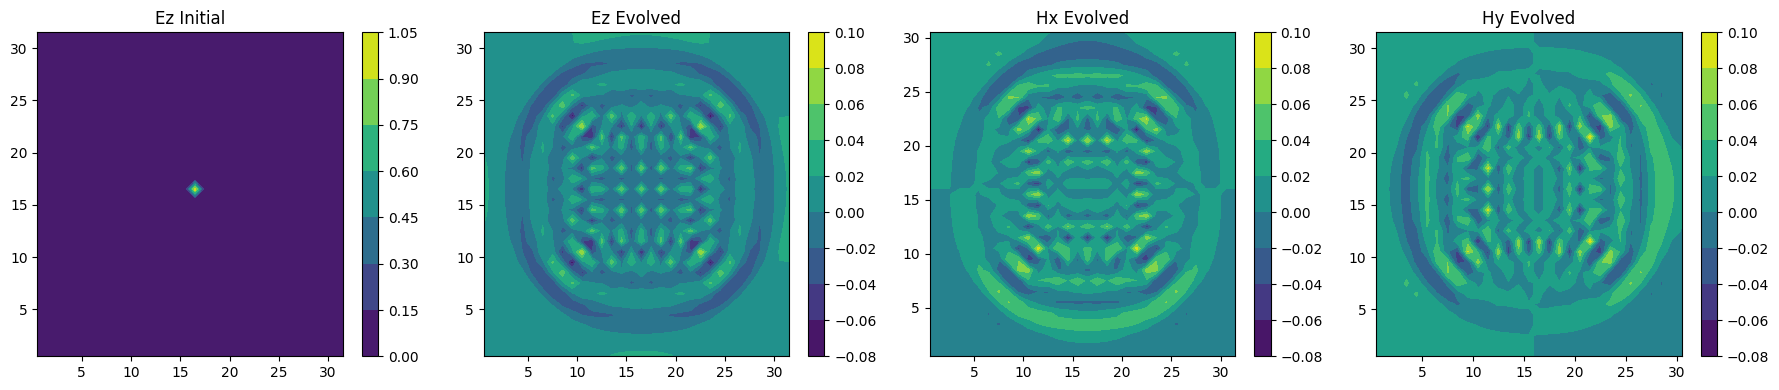

In [ ]:
# Parameters
nx = 32
sigma_x = nx/4
sigma_y = nx/4#0.2
mu = nx/2            # mean (center at 0)

# Create coordinate grid
x = np.linspace(0, nx-1, nx)
y = np.linspace(0, nx-1, nx)
X, Y = np.meshgrid(x, y)

# 2D Gaussian function
gaussian_2d = np.exp(-((X - mu)**2)/ (2 * sigma_x**2) - ((Y - mu)**2)/ (2 * sigma_y**2) )

# Normalize (optional, so sum = 1)
gaussian_2d /= gaussian_2d.sum()

# Flatten to 1D
gaussian_flat = gaussian_2d.flatten()
initial_state = np.pad(gaussian_flat, (0, nx*nx + 2*nx*(nx-1) - len(gaussian_flat)), mode='constant')

deltastate = np.zeros(nx*nx)
deltaflat = deltastate.flatten()
deltaflat[nx*nx//2+nx//2:nx*nx//2+nx//2+1] = 1
initial_state = np.pad(deltaflat, (0, nx*nx + 2*nx*(nx-1) - len(deltaflat)), mode='constant')

T = 16
EzHxHy2 = tools.ebu_classical_unstructured(nx , T , initial_state)[0]
EzHxHy2 = EzHxHy2/(np.linalg.norm(EzHxHy2))

# print(EzHxHy)

#Plotting 
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# First plot
# im1 = axs[0].contourf(gaussian_2d, cmap="viridis", origin="lower")
im1 = axs[0].contourf(deltaflat.reshape(nx, nx), cmap="viridis", origin="lower")

axs[0].set_title("Ez Initial")
fig.colorbar(im1, ax=axs[0])

# Second plot
im2 = axs[1].contourf(EzHxHy2[:nx*nx].reshape(nx, nx), cmap="viridis", origin="lower")
axs[1].set_title("Ez Evolved")
fig.colorbar(im2, ax=axs[1])

# Third plot
im3 = axs[2].contourf(EzHxHy2[nx*nx:2*nx*nx+ -nx].reshape(nx-1, nx), cmap="viridis", origin="lower")
axs[2].set_title("Hx Evolved")
fig.colorbar(im2, ax=axs[2])

# Fourth plot
im4 = axs[3].contourf(EzHxHy2[-nx*nx+nx:].reshape(nx, nx-1), cmap="viridis", origin="lower")
axs[3].set_title("Hy Evolved")
fig.colorbar(im2, ax=axs[3])

plt.tight_layout()
plt.show()